<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

# Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [6]:
import io
from google.colab import files

In [7]:
uploaded = files.upload()

Saving MODEL_A.csv to MODEL_A (1).csv


In [8]:
dataset = pd.read_csv(io.BytesIO(uploaded['MODEL_A.csv']))

In [9]:
dataset

,Sequence_Number,Job_Number,Revision_Group,Week_Number,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220_1,SH1_B5_Diameter -0.220_2,SH1_B5_Diameter -0.160_1,SH1_B5_Diameter -0.160_2,SH1_B5_Position -0.005_1,...,SH2_A8_Diameter -0.650_1,SH2_A8_Diameter -0.650_2,SH2_A8_Diameter -0.650_3,SH2_A8_True Position -0.003_1,SH2_A8_True Position -0.003_2,SH2_A8_True Position -0.003_3,SH5 A8_SURFACE FINISH_1,SH5 A4_SURFACE FINISH_2,SH1 B5_DEPTH .100,RCAI_Defect
0,1,1,1,1,14.01740,0.22220,0.22240,0.16120,0.16130,0.00070,...,0.65180,0.65180,0.65180,0.00060,0.00120,0.00120,7.00,7.00,0.101,1
1,2,2,1,2,14.01601,0.22146,0.22200,0.16120,0.16115,0.00037,...,0.65162,0.65170,0.65174,0.00193,0.00085,0.00117,7.00,7.00,0.101,1
2,3,2,1,2,14.01594,0.22180,0.22201,0.16120,0.16121,0.00073,...,0.65170,0.65171,0.65170,0.00119,0.00084,0.00102,7.00,7.00,0.101,0
3,4,2,1,2,14.01848,0.22179,0.22190,0.16118,0.16117,0.00032,...,0.65171,0.65175,0.65175,0.00163,0.00108,0.00104,7.00,7.00,0.101,0
4,5,2,1,2,14.01607,0.22183,0.22203,0.16119,0.16112,0.00025,...,0.65170,0.65169,0.65171,0.00081,0.00083,0.00113,11.27,8.33,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,415,12,2,23,14.01592,0.22124,0.22143,0.16046,0.16046,0.00152,...,0.65210,0.65210,0.65213,0.00117,0.00039,0.00093,7.00,7.00,0.102,0
407,416,12,2,23,14.01756,0.22127,0.22148,0.16046,0.16048,0.00066,...,0.65213,0.65212,0.65213,0.00228,0.00084,0.00112,7.00,7.00,0.102,1
408,417,12,2,23,14.01847,0.22127,0.22146,0.16047,0.16048,0.00006,...,0.65211,0.65211,0.65213,0.00195,0.00061,0.00136,7.00,7.00,0.103,1
409,418,12,2,23,14.01795,0.22128,0.22149,0.16047,0.16049,0.00047,...,0.65211,0.65211,0.65212,0.00177,0.00077,0.00105,7.00,7.00,0.101,1


In [10]:
dataset['RCAI_Defect'].value_counts()

0    347
1     64
Name: RCAI_Defect, dtype: int64

In [11]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,46:47].values

In [12]:
print(X)

[[1.00e+00 1.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [2.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [3.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 ...
 [4.17e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.03e-01]
 [4.18e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [4.19e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.02e-01]]


In [13]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


In [14]:
dataset.shape

(411, 47)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sequence_Number                411 non-null    int64  
 1   Job_Number                     411 non-null    int64  
 2   Revision_Group                 411 non-null    int64  
 3   Week_Number                    411 non-null    int64  
 4   SH1_C2_Diameter -14.020        411 non-null    float64
 5   SH1_B5_Diameter -0.220_1       411 non-null    float64
 6   SH1_B5_Diameter -0.220_2       411 non-null    float64
 7   SH1_B5_Diameter -0.160_1       411 non-null    float64
 8   SH1_B5_Diameter -0.160_2       411 non-null    float64
 9   SH1_B5_Position -0.005_1       411 non-null    float64
 10  SH1_B5_Position -0.005_2       411 non-null    float64
 11  SH1_B1_Width -0.190            411 non-null    float64
 12  SH1_B1_Distance -0.200         411 non-null    flo

# Taking care of missing data

Impute Missing Values. 

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [17]:
print(X)

[[1.00e+00 1.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [2.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [3.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 ...
 [4.17e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.03e-01]
 [4.18e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [4.19e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.02e-01]]


In [18]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


Check the percentage of missing values in each variable.

In [19]:
dataset.isnull().sum()/len(dataset)*100

Sequence_Number                  0.0
Job_Number                       0.0
Revision_Group                   0.0
Week_Number                      0.0
SH1_C2_Diameter -14.020          0.0
SH1_B5_Diameter -0.220_1         0.0
SH1_B5_Diameter -0.220_2         0.0
SH1_B5_Diameter -0.160_1         0.0
SH1_B5_Diameter -0.160_2         0.0
SH1_B5_Position -0.005_1         0.0
SH1_B5_Position -0.005_2         0.0
SH1_B1_Width -0.190              0.0
SH1_B1_Distance -0.200           0.0
SH1_B1_Position- 0.002           0.0
SH1_D5_Position -0.005_1         0.0
SH1_D5_Position -0.005_2         0.0
SH1_D5_Position -0.005_3         0.0
SH1_D5_Position -0.005_4         0.0
SH2_D7_Width -0.190              0.0
SH2_D7_Distance -0.20            0.0
SH2_D7_Position- 0.002           0.0
SH2_B1_Position -0.005_1         0.0
SH2_B1_Position -0.005_2         0.0
SH2_B1_Position -0.005_3         0.0
SH2_B1_Position -0.005_4         0.0
SH2_B1_Position -0.005_5         0.0
SH2_B1_Position -0.005_6         0.0
S

# Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [21]:
print(X_train)

[[3.320e+02 1.200e+01 2.000e+00 ... 8.000e+00 8.000e+00 1.000e-01]
 [4.190e+02 1.200e+01 2.000e+00 ... 7.000e+00 7.000e+00 1.020e-01]
 [3.770e+02 1.200e+01 2.000e+00 ... 6.000e+00 6.000e+00 1.005e-01]
 ...
 [1.180e+02 5.000e+00 1.000e+00 ... 9.000e+00 9.000e+00 1.010e-01]
 [4.800e+01 2.000e+00 1.000e+00 ... 9.000e+00 8.000e+00 1.010e-01]
 [1.750e+02 8.000e+00 2.000e+00 ... 8.000e+00 8.000e+00 1.005e-01]]


In [22]:
print(X_test)

[[3.010e+02 1.000e+01 2.000e+00 ... 7.000e+00 8.000e+00 1.005e-01]
 [7.700e+01 4.000e+00 1.000e+00 ... 7.000e+00 7.000e+00 1.000e-01]
 [3.400e+02 1.200e+01 2.000e+00 ... 6.000e+00 6.000e+00 1.005e-01]
 ...
 [2.100e+01 2.000e+00 1.000e+00 ... 1.100e+01 9.000e+00 1.015e-01]
 [2.280e+02 1.000e+01 2.000e+00 ... 7.000e+00 7.000e+00 1.010e-01]
 [1.500e+01 2.000e+00 1.000e+00 ... 9.000e+00 1.100e+01 1.005e-01]]


In [23]:
print(Y_train)

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]


In [24]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [26]:
print(X_train)

[[ 1.03180009  1.12182475  0.70064905 ...  0.32054161  0.2841169
  -1.31103535]
 [ 1.77167816  1.12182475  0.70064905 ... -0.31473119 -0.29687209
   1.66076559]
 [ 1.41449564  1.12182475  0.70064905 ... -0.950004   -0.87786107
  -0.56808512]
 ...
 [-0.78812985 -0.92726803 -1.42724806 ...  0.95581442  0.86510588
   0.17486512]
 [-1.38343404 -1.80545065 -1.42724806 ...  0.95581442  0.2841169
   0.17486512]
 [-0.30338216 -0.04908541  0.70064905 ...  0.32054161  0.2841169
  -0.56808512]]


In [27]:
print(X_test)

[[ 0.76816538  0.53636967  0.70064905 ... -0.31473119  0.2841169
  -0.56808512]
 [-1.13680802 -1.21999557 -1.42724806 ... -0.31473119 -0.29687209
  -1.31103535]
 [ 1.09983486  1.12182475  0.70064905 ... -0.950004   -0.87786107
  -0.56808512]
 ...
 [-1.61305137 -1.80545065 -1.42724806 ...  2.22636003  0.86510588
   0.91781535]
 [ 0.14734816  0.53636967  0.70064905 ... -0.31473119 -0.29687209
   0.17486512]
 [-1.66407744 -1.80545065 -1.42724806 ...  0.95581442  2.02708385
  -0.56808512]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [28]:
dataset.var()

Sequence_Number                  1.468147e+04
Job_Number                       1.239954e+01
Revision_Group                   2.235713e-01
Week_Number                      4.078641e+01
SH1_C2_Diameter -14.020          1.260268e-06
SH1_B5_Diameter -0.220_1         5.813237e-08
SH1_B5_Diameter -0.220_2         5.892645e-08
SH1_B5_Diameter -0.160_1         5.090564e-08
SH1_B5_Diameter -0.160_2         4.918251e-08
SH1_B5_Position -0.005_1         2.613605e-07
SH1_B5_Position -0.005_2         2.524300e-07
SH1_B1_Width -0.190              4.696584e-08
SH1_B1_Distance -0.200           5.105814e-07
SH1_B1_Position- 0.002           2.443767e-08
SH1_D5_Position -0.005_1         3.036265e-07
SH1_D5_Position -0.005_2         3.310338e-07
SH1_D5_Position -0.005_3         1.193464e-07
SH1_D5_Position -0.005_4         1.610865e-07
SH2_D7_Width -0.190              4.131752e-08
SH2_D7_Distance -0.20            4.325494e-07
SH2_D7_Position- 0.002           1.106390e-06
SH2_B1_Position -0.005_1         6

# Training the Logistic Regression model on the Training set

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

# Predicting the Test set results

In [30]:
Y_pred = lr.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]


# Making the Confusion Matrix (Logistic Regression)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(cohen_kappa_score(Y_test, Y_pred))

[[68  4]
 [ 2  9]]
0.927710843373494
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        72
           1       0.69      0.82      0.75        11

    accuracy                           0.93        83
   macro avg       0.83      0.88      0.85        83
weighted avg       0.93      0.93      0.93        83

0.7080890973036342


In [32]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred)

0.5905299519757351

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.8813131313131314

In [34]:
from sklearn.metrics import zero_one_loss
zero_one_loss(Y_test, Y_pred)

0.07228915662650603

In [35]:
from sklearn.metrics import roc_curve
print(roc_curve(Y_test, Y_pred))

(array([0.        , 0.05555556, 1.        ]), array([0.        , 0.81818182, 1.        ]), array([2, 1, 0]))


# Applying k-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Accuracy: 90.89 %
Standard Deviation: 5.24 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prediction Probability Data Matrices

In [37]:
r_probs = [0 for _ in range(len(Y_test))] ##Worst case scenario
lr_probs = lr.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [38]:
lr_probs = lr_probs[:, 1]

# Computing AUROC and ROC curve values

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUROC

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [40]:
r_auc = roc_auc_score(Y_test, r_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

# Print AUROC scores

In [41]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression Classifier: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression Classifier: AUROC = 0.903


# Calculate ROC curve

In [42]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

# Plot the ROC curve

In [43]:
import matplotlib.pyplot as plt

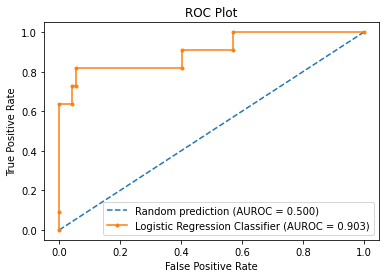

In [44]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression Classifier (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()